# Assignment 1
In this assignment you will create a model that is able to detect fraudulent credit card transactions. The structure of this assignment is as follows:

1. Loading the data
1. Slicing the data into a training, validation and test set
1. Normalising the data
1. Building and training an initial model
1. Improving to model such that it has sufficient capacity
1. Evaluating your trained model on the test set

As always, first we load Keras and some helper functions:

In [6]:
mat = matrix(c(1,1,1,1), ncol = 2, nrow = 2)
vec = c(1,1)
length(vec)
length(mat)
dim(mat)

[1] 2

[1] 4

[1] 2 2

In [7]:
library(keras)
source('assignment-1-helpers.R')
library(tensorflow)

In [8]:
k_clear_session()
threads <- 8L
config <- tf$ConfigProto(intra_op_parallelism_threads = 1L, 
                         inter_op_parallelism_threads = 1L)
session = tf$Session(config=config)
k_set_session(session)

## Exercise 1: loading the data
Load the dataset from the `dataset_creditcard_fraud_shuffled` function like we have done in the previous notebooks. Store the data in variables `x` and `y`.

Inspect the data set and its dimensions using the `head` and `dim` functions. How many feature columns do we have? How many samples? Write down your answer as a comment in the second cell below.

In [9]:
data = dataset_creditcard_fraud_shuffled()

In [10]:
dim(data$x)
length(data$y)

[1] 28430    29

[1] 28430

## Exercise 2: splitting the data
Divide the data set into a training and test set, split 80%-20%. Divide the training set again into a training and validation set, again split 80%-20%. Show the dimensions of the three different sets.

In [11]:
index <- 0.8 * length(data$y)
x_test <- data$x[-(1:index),]
y_test <- data$y[-(1:index)]

x_train <- data$x[1:index,]
y_train <- data$y[1:index]

index <- 0.8 * length(y_train)
x_val <- x_train[-(1:index),]
y_val <- y_train[-(1:index)]

x_train <- x_train[1:index,]
y_train <- y_train[1:index]

In [12]:
dim(x_test)
length(y_test)
dim(x_val)
length(y_val)
dim(x_train)
length(y_train)

[1] 5686   29

[1] 5686

[1] 4549   29

[1] 4549

[1] 18195    29

[1] 18195

## Exercise 3: normalising the data
Inspect the data set with `head`. You will see that the first 28 columns of `x` are the output of a principal components analysis (PCA) transformation. The last column, `amount`, is the amount charged.
`y` contains the labels, where a value of `1` denotes fraud, `0` no fraud.

Normalise the `amount` column in the training, validation and test sets by **standardising** the values. That is: converting all values in this column into **z-scores**. You can do this by subtracting the column's mean from the values, and then dividing the resulting values by the standard deviation of the column, like so:

$$
z = \frac{x - \mu}{\sigma}
$$

You can either do this by hand, or use R's [`scale`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/scale) function for this.

**Hint**: be careful to minimise **information leakage** across the data sets. Calculate the mean and standard deviation on the training set, then use these values to standardise the training set, validation set and test set.

In [13]:
x_train[1, ]

PCA1         PCA2         PCA3         PCA4         PCA5         PCA6 
-17.72842430  12.06520973 -19.20801766  10.36463385 -15.39415768   2.94650881 
        PCA7         PCA8         PCA9        PCA10        PCA11        PCA12 
-21.19394727  -3.90917653 -10.05919488 -14.88211218   4.95807144 -12.24091768 
       PCA13        PCA14        PCA15        PCA16        PCA17        PCA18 
  3.18249335  -2.55832013  -0.51329881  -8.49399332 -17.46781508  -8.72342088 
       PCA19        PCA20        PCA21        PCA22        PCA23        PCA24 
  3.21242621   1.39029054  -9.17103319  -0.92830965   1.19986446  -0.56205047 
       PCA25        PCA26        PCA27        PCA28       amount 
 -4.30150000  -0.04667275  -5.41385786   2.12056833   6.26398038

In [14]:
mean <- apply(x_train, 2, mean)
sd <- apply(x_train, 2, sd)
mean['amount']
sd['amount']

amount 
101.3659

amount 
234.6767

In [15]:
scale(x_train[, 29], center = mean['amount'], scale = sd['amount'])

-0.40524657
-0.39065535
-0.42081684
5.38993890
-0.24018534
-0.42767734
-0.35264008
-0.43033127
-0.42865742
-0.12517604
-0.39780646


In [16]:
x_train[, 29] <- scale(x_train[, 29], center = mean['amount'], scale = sd['amount'])
x_val[, 29] <- scale(x_val[, 29], center = mean['amount'], scale = sd['amount'])
x_test[, 29]  <- scale(x_test[, 29], center = mean['amount'], scale = sd['amount'])

## Exercise 4: building an initial model
Build a neural network suitable for this binary classification problem. As a start, build the network according to the following specifications:

1. Architecture: a single hidden layer with four neurons
1. Optimizer: ADAM, with learning rate 0.001
1. Number of epochs: 250

We will leave the rest of the network configuration up to you. Please try to remember the rules of thumb we mentioned in the slides.

Train the network with these settings, and show the loss and accuracy plot. Do you think this particular network has sufficient capacity to model the problem? Why or why not? Motivate your answer in a few sentences.

In [17]:
y_train = matrix(y_train)
x_train = matrix(x_train, ncol = 29)
y_val = matrix(y_val)
x_val = matrix(x_val, ncol = 29)


y_train = as.array(y_train)
x_train = as.array(x_train)
y_val = as.array(y_val)
x_val = as.array(x_val)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 4)                       120         
________________________________________________________________________________
dense_4 (Dense)                     (None, 1)                       5           
Total params: 125
Trainable params: 125
Non-trainable params: 0
________________________________________________________________________________



Time difference of 19.00274 secs

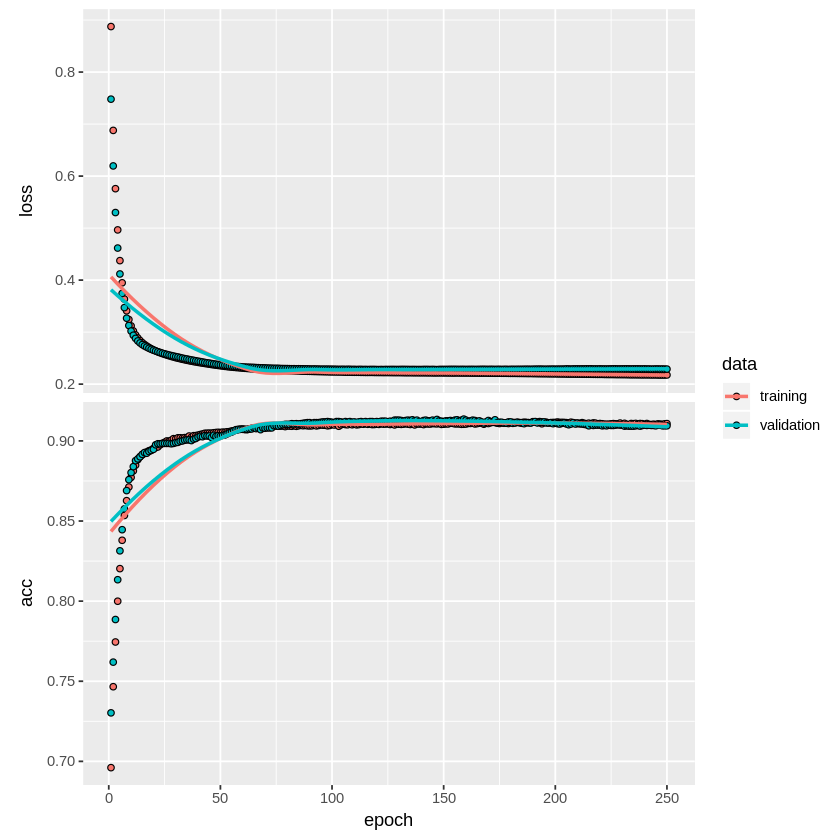

In [19]:
start <- Sys.time()
model <- keras_model_sequential() %>%
    layer_dense(units = 4, activation = "relu", input_shape = c(29)) %>%
    layer_dense(units = 1, activation = "sigmoid")

model


model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 250,
    batch_size = 512
)
end <- Sys.time()
end - start
plot(history)

In [13]:
# <MOTIVATE YOUR ANSWER HERE>

## Exercise 5: improving the model
Increase model capacity and try to obtain close to zero loss on the training set (and an accuracy of 1). You can also modify the learning rate, batch size or any other hyperparameter you see fit.

Show the loss and accuracy graph. Around what epoch does the model start overfitting given your model? Motivate your answer with a few sentences.

**Hint**: try not to create an overly complex model. The number of parameters should be in the low ten thousands.

In [14]:
model <- keras_model_sequential() %>%
    layer_dense(units = 64, activation = "relu", input_shape = c(29)) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

model


model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 250,
    batch_size = 512,
    callbacks=list(Progress$new())
)
plot(history)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 64)                      1920        
________________________________________________________________________________
dense_4 (Dense)                     (None, 64)                      4160        
________________________________________________________________________________
dense_5 (Dense)                     (None, 64)                      4160        
________________________________________________________________________________
dense_6 (Dense)                     (None, 1)                       65          
Total params: 10,305
Trainable params: 10,305
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# <MOTIVATE YOUR ANSWER HERE>

## Exercise 6: evaluating the model
Train your model again, this time with the number of epochs just lower than where you would start overfitting. 

Evaluate your model on the test set and report the final loss and accuracy. The accuracy should be close to the accuracy you got on your validation set, and is usually slightly lower. Why is that? Motivate your answer in a few sentences.

In [ ]:
<TRAIN AND EVALUATE YOUR MODEL HERE>

In [ ]:
# <MOTIVATE YOUR ANSWER HERE>